In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from glob import glob
import pandas as pd
import linecache

In [ ]:
# # カテゴリを配列で取得
# categories = [name for name in os.listdir("/content/drive/MyDrive/catch-up/torch-lstm/text/") if os.path.isdir("/content/drive/MyDrive/catch-up/torch-lstm/text/" + name)]
# print(categories)

['dokujo-tsushin', 'movie-enter', 'peachy', 'smax', 'livedoor-homme', 'sports-watch', 'kaden-channel', 'topic-news', 'it-life-hack']


In [ ]:
# datasets = pd.DataFrame(columns=["title", "category"])
# for cat in categories:
#     path = "/content/drive/MyDrive/catch-up/torch-lstm/text/" + cat + "/*.txt"
#     print(path)
#     files = glob(path)
#     for text_name in files:
#         title = linecache.getline(text_name, 3)
#         s = pd.Series([title, cat], index=datasets.columns)
#         datasets = datasets.append(s, ignore_index=True)

# # データフレームシャッフル
# datasets = datasets.sample(frac=1).reset_index(drop=True)
# datasets.head()

/content/drive/MyDrive/catch-up/torch-lstm/text/dokujo-tsushin/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/movie-enter/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/peachy/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/smax/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/livedoor-homme/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/sports-watch/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/kaden-channel/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/topic-news/*.txt
/content/drive/MyDrive/catch-up/torch-lstm/text/it-life-hack/*.txt


,title,category
0,KDDI、au向け「DIGNO ISW11K」に電波の届きにくいところで通話が途切れるなどの...,smax
1,インタビュ—：マット・ボマー（ニール・キャフリー役）\n,movie-enter
2,くさったよめがあらわれた！vol.05「自分を変えたい…それは楽しめることをみつけること!!...,dokujo-tsushin
3,【Sports Watch】最強ミランのサポート施設「ミランラボ」とは？\n,sports-watch
4,吉田麻也、サウサンプトンFC移籍が決定\n,sports-watch


In [3]:
datasets = pd.read_csv("/content/drive/MyDrive/catch-up/torch-lstm/datasets.csv")
categories = set(datasets["category"])

In [4]:
datasets.head()

,Unnamed: 0,title,category
0,0,テレビ放送禁止の「お蔵入り恐怖映像」をウェブで公開\n,movie-enter
1,1,ZTE、Intel製「Atom」搭載のAndroidスマートフォン「ZTE Grand X ...,smax
2,2,なぜモテない？！料理男子\n,dokujo-tsushin
3,3,子どもだけにはもったいない！ トイストーリーの世界を体験できそうなカメラ付きミニカー【話題】\n,kaden-channel
4,4,女の本音全開！「彼氏にドン引きした○○な瞬間」\n,dokujo-tsushin


In [5]:
categories

{'dokujo-tsushin',
 'it-life-hack',
 'kaden-channel',
 'livedoor-homme',
 'movie-enter',
 'peachy',
 'smax',
 'sports-watch',
 'topic-news'}

In [ ]:
import torch
import torch.nn as nn

In [ ]:
embeds = nn.Embedding(10, 6) # (Embedding(単語の合計数, ベクトル次元数))

In [ ]:
w1 = torch.tensor([2])
print(embeds(w1))

tensor([[-0.1243, -0.0331,  0.9987,  0.9156,  1.8224,  2.0265]],
       grad_fn=<EmbeddingBackward>)


In [ ]:
w2 = torch.tensor([2,4,9])
print(embeds(w2))

tensor([[-0.1243, -0.0331,  0.9987,  0.9156,  1.8224,  2.0265],
        [ 0.9259,  1.0508, -0.1091,  0.8305, -2.2588, -1.2328],
        [ 2.0645,  0.8336, -1.6458, -1.6503,  0.1322, -0.4055]],
       grad_fn=<EmbeddingBackward>)


In [ ]:
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
# 以下で報告があるようにmecab-python3のバージョンを0.996.5にしないとtokezerで落ちる
# https://stackoverflow.com/questions/62860717/huggingface-for-japanese-tokenizer
!pip install mecab-python3==0.996.5
!pip install unidic-lite # これないとMeCab実行時にエラーで落ちる

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp

In [ ]:
import MeCab
import re
import torch

tagger = MeCab.Tagger("-Owakati")

def make_wakati(sentence):
    # MeCabで分かち書き
    sentence = tagger.parse(sentence)
    # 半角全角英数字除去
    sentence = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", sentence)
    # 記号もろもろ除去
    sentence = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", sentence)
    # スペースで区切って形態素の配列へ
    wakati = sentence.split(" ")
    # 空の要素は削除
    wakati = list(filter(("").__ne__, wakati))
    return wakati

# テスト
test = "【人工知能】は「人間」の仕事を奪った"
print(make_wakati(test))
# ['人工', '知能', 'は', '人間', 'の', '仕事', 'を', '奪っ', 'た']

# 単語ID辞書を作成する
word2index = {}
for title in datasets["title"]:
    wakati = make_wakati(title)
    for word in wakati:
        if word in word2index: continue
        word2index[word] = len(word2index)
print("vocab size : ", len(word2index))

['人工', '知能', 'は', '人間', 'の', '仕事', 'を', '奪っ', 'た']
vocab size :  13229


In [ ]:
def sentence2index(sentence):
    wakati = make_wakati(sentence)
    print(wakati)
    return torch.tensor([word2index[w] for w in wakati], dtype=torch.long)

# テスト
test = "例のあのメニューも！ニコニコ超会議のフードコートメニュー14種類紹介（前半）"
print(sentence2index(test))

['例', 'の', 'あの', 'メニュー', 'も', 'ニコニコ', '超', '会議', 'の', 'フードコートメニュー', '種類', '紹介', '前半']
tensor([9724,    3, 2574, 1442,  296, 2112,  393, 2113,    3, 9725, 4289,  392,
        9726])


In [ ]:
VOCAB_SIZE = len(word2index)
EMBEDDING_DIM = 10
test = "ユージの前に立ちはだかったJOY「僕はAKBの高橋みなみを守る」"
inputs = sentence2index(test)
embeds = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM)
sentence_matrix = embeds(inputs)
print(sentence_matrix.size())
print(sentence_matrix)

['ユージ', 'の', '前', 'に', '立ちはだかっ', 'た', '僕', 'は', 'の', '高橋', 'みなみ', 'を', '守る']
torch.Size([13, 10])
tensor([[ 1.4784, -0.2617, -2.0242, -0.0331, -0.3714,  1.4632, -0.4848,  1.1490,
          1.1543,  0.2582],
        [ 0.4376,  2.0888,  0.4745,  1.0604, -2.3193,  0.5949, -2.5939,  0.0523,
         -0.2160,  0.9448],
        [-1.1178, -1.3528, -0.8426,  0.0629,  0.8236,  0.8878, -0.4048,  0.1908,
          0.8876,  0.1014],
        [ 1.9492,  0.3907, -0.0187,  0.9973,  1.0562,  0.6034,  1.0458,  1.2029,
          0.1457,  0.2932],
        [-1.2435, -0.2268, -1.0088,  0.4034,  1.7350,  0.7380,  0.5232,  0.5126,
         -0.4258,  0.5525],
        [-1.0685,  0.0043, -0.7458, -0.6667,  1.1781, -0.9665, -1.3770, -0.4956,
          0.4184, -0.0496],
        [-0.2119, -2.0283, -0.1998, -0.1038, -0.6780, -0.7180,  0.7562, -1.5352,
         -1.1077,  1.4438],
        [-0.9750,  0.1161, -1.0608, -0.0995, -1.2811,  0.5159,  0.8173,  0.8016,
          0.8048,  0.3485],
        [ 0.4376,  2.0888,  0.

In [ ]:
sentence_matrix.view(len(sentence_matrix), 1, -1).size()

torch.Size([13, 1, 10])

In [ ]:
VOCAB_SIZE = len(word2index)
EMBEDDING_DIM = 10
HIDDEN_DIM = 128
embeds = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM)
lstm = nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM)
s1 = "震災をうけて感じた、大切だと思ったこと"
print(make_wakati(s1))
#['震災', 'を', 'うけ', 'て', '感じ', 'た', '大切', 'だ', 'と', '思っ', 'た', 'こと']

['震災', 'を', 'うけ', 'て', '感じ', 'た', '大切', 'だ', 'と', '思っ', 'た', 'こと']


In [ ]:
inputs1 = sentence2index(s1)
emb1 = embeds(inputs1)
lstm_inputs1 = emb1.view(len(inputs1), 1, -1)
out1, out2 = lstm(lstm_inputs1)
print(out1)
print(out2)

['震災', 'を', 'うけ', 'て', '感じ', 'た', '大切', 'だ', 'と', '思っ', 'た', 'こと']
tensor([[[-0.0508,  0.0211,  0.0039,  ..., -0.0570,  0.0019, -0.0405]],

        [[-0.0092,  0.0044, -0.0211,  ..., -0.0367,  0.0417, -0.0210]],

        [[-0.0311,  0.0270, -0.0328,  ..., -0.0537,  0.0398, -0.0335]],

        ...,

        [[-0.2023,  0.0050,  0.0818,  ..., -0.0286, -0.0079, -0.1294]],

        [[-0.0722, -0.0314, -0.0188,  ..., -0.0099, -0.0264,  0.0175]],

        [[-0.1076,  0.1094, -0.0054,  ..., -0.0872,  0.0454, -0.0709]]],
       grad_fn=<StackBackward>)
(tensor([[[-0.1076,  0.1094, -0.0054,  0.0154, -0.0093, -0.0321, -0.0385,
           0.0361, -0.0245,  0.0217, -0.0335,  0.0711, -0.0199, -0.0913,
          -0.0477,  0.1413, -0.0116, -0.0101,  0.0156,  0.0015,  0.0379,
          -0.0477,  0.0386, -0.0518,  0.0467, -0.0234, -0.0626,  0.0743,
           0.0486,  0.0091, -0.0382,  0.0010,  0.0580, -0.1008, -0.0761,
           0.0498,  0.0878, -0.0853,  0.0781,  0.0510,  0.0915, -0.0514,
          

In [ ]:
# class LSTMClassifier(nn.Module):
#     def __init__(self, embedding_dim, hidden_dim, vocab_size, target_size):
#         # 親クラスのコンストラクタ。決まり文句
#         super(LSTMClassifier, self).__init__()
#         # 隠れ層の次元数。これは好きな値に設定しても行列計算の過程で出力には出てこないので。
#         self.hidden_dim = hidden_dim
#         # インプットの単語をベクトル化するために使う
#         self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
#         # LSTMの隠れ層。これ１つでOK。超便利。
#         self.lstm = nn.LSTM(embedding_dim, hidden_dim)
#         # LSTMの出力を受け取って全結合してsoftmaxに食わせるための１層のネットワーク
#         self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
#         # softmaxのLog版。dim=0で列、dim=1で行方向を確率変換。
#         self.softmax = nn.LogSoftmax(dim=1)
    
#     def forward(self, sentence):
#         # 文章内の単語をベクトル化して出力する
#         embeds = self.word_embeddings(sentence)
#         # lstmに入れるように成形する
#         # 第二戻り値のみの書き方こんなんなんや...
#         _, letm_out = self.lstm(embeds.view(len(sentence), 1, -1))
#         tag_space = self.hidden2tag(lstm_out[0].view(-1, self.hidden_dim))
#         tag_scores = self.softmax(tag_space)
#         return tag_scores

In [ ]:
# nn.Moduleを継承して新しいクラスを作る。決まり文句
class LSTMClassifier(nn.Module):
    # モデルで使う各ネットワークをコンストラクタで定義
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        # 親クラスのコンストラクタ。決まり文句
        super(LSTMClassifier, self).__init__()
        # 隠れ層の次元数。これは好きな値に設定しても行列計算の過程で出力には出てこないので。
        self.hidden_dim = hidden_dim
        # インプットの単語をベクトル化するために使う
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        # LSTMの隠れ層。これ１つでOK。超便利。
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        # LSTMの出力を受け取って全結合してsoftmaxに食わせるための１層のネットワーク
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        # softmaxのLog版。dim=0で列、dim=1で行方向を確率変換。
        self.softmax = nn.LogSoftmax(dim=1)

    # 順伝播処理はforward関数に記載
    def forward(self, sentence):
        # 文章内の各単語をベクトル化して出力。2次元のテンソル
        embeds = self.word_embeddings(sentence)
        # 2次元テンソルをLSTMに食わせられる様にviewで３次元テンソルにした上でLSTMへ流す。
        # 上記で説明した様にmany to oneのタスクを解きたいので、第二戻り値だけ使う。
        _, lstm_out = self.lstm(embeds.view(len(sentence), 1, -1))
        # lstm_out[0]は３次元テンソルになってしまっているので2次元に調整して全結合。
        tag_space = self.hidden2tag(lstm_out[0].view(-1, self.hidden_dim))
        # softmaxに食わせて、確率として表現
        tag_scores = self.softmax(tag_space)
        return tag_scores

In [ ]:
category2index = {}
for cat in categories:
    if cat in category2index: continue
    category2index[cat] = len(category2index)

print(category2index)

def category2tensor(cat):
    return torch.tensor([category2index[cat]], dtype = torch.long)

print(category2tensor("it-life-hack"))

{'dokujo-tsushin': 0, 'movie-enter': 1, 'peachy': 2, 'smax': 3, 'livedoor-homme': 4, 'sports-watch': 5, 'kaden-channel': 6, 'topic-news': 7, 'it-life-hack': 8}
tensor([8])


In [ ]:
from sklearn.model_selection import train_test_split
import torch.optim as optim
train, test = train_test_split(datasets, train_size = .7)

In [ ]:
# 単語のベクトル次元数
EMBEDDING_DIM = 10
# 隠れ層の次元数
HIDDEN_DIM = 128
# データ全体の単語数
VOCAB_SIZE = len(word2index)
# 分類先のカテゴリの数
TAG_SIZE = len(categories)

In [ ]:
# モデル宣言
model = LSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TAG_SIZE)
# 損失関数はNLLLoss()を使う。LogSoftmaxを使う時はこれを使うらしい。
loss_function = nn.NLLLoss()
# 最適化の手法はSGDで。lossの減りに時間かかるけど、一旦はこれを使う。
optimizer = optim.SGD(model.parameters(), lr=0.01)

## GPUに切り替えてから学習を実行する

In [ ]:
losses = []

for epoch in range(100):
    all_loss = 0
    for title, cat in zip(train["title"], train["category"]):
        # 勾配の情報をリセット
        model.zero_grad()
        # 文章を単語IDの系列に変換
        inputs = sentence2index(title)
        # 順伝搬の結果をget
        out = model(inputs)
        # 正解カテゴリをテンソル化
        answer = category2tensor(cat)
        # lossの計算
        loss = loss_function(out, answer)
        # 勾配をリセット
        loss.backward()
        # 逆伝搬でパラメータを更新する
        optimizer.step()
        # lossを集計
        all_loss += loss.item()
    losses.append(all_loss)
    print("epoch", epoch, "\t", "loss", all_loss)
print("done.")

ストリーミング出力は最後の 5000 行に切り捨てられました。
['重量', 'を', '当て', 'て', 'を', 'ゲット', 'の', '重', 'さ', '当て', 'クイズ', 'デジ', '通']
['ドコモ', 'ユーザー', '大丈夫', 'あなた', 'の', 'ケータイ', 'が', '今週', 'いっぱい', 'で', '使え', 'なく', 'なる', 'かも', 'ニュース']
['肉食', '女子', 'は', '要', 'チェック', '最強', 'の', '安心', '安全', 'ロハス', 'な', 'ビーフ']
['韓国', '企業', 'と', 'の', '提携', 'を', '発表', 'し', 'た', '亀田製菓', 'の', 'ブログ', 'が', '炎上']
['高田', '監督', '辞任', 'は', '少年', 'ファン', 'の', '暴言', 'が', '決め手', 'に']
['ザッケローニ', '新', '監督', 'イタリア', '記者', 'の', '評価', 'は']
['時間', 'つぶし', 'に', '有効', 'ゲーセン', 'に', '設置', 'さ', 'れ', 'て', 'いる', '一', '人', '用', 'カラオケボックス', '話題']
['もちろん', '見', 'て', 'き', 'まし', 'た', 'デル', 'が', 'はなつ', 'の', '本命', '写真', 'で', '見', 'て', 'も', 'カッコイイ']
['ジュエル', 'クリップ', 'で', 'オフィス', 'でも', '簡単', '愛さ', 'れ', 'に']
['ページ', 'を', '丸ごと', '取り込む', 'ワザ', '知っ', 'て', 'いる', 'と', 'お', '得', 'な', 'パソコン', '快適', '術', '知っ', '得', '虎の巻']
['頭', 'おかしい', '被災', '地', 'アイドル', 'デビュー', 'に', '疑問', 'の', '声']
['落合', '元', '監督', '内川', 'へ', 'の', 'クレーム', 'に', '言及', 'もし', '専門', '家', 'に', '言わ', 'せ', 'たら']
['ラジオ',

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

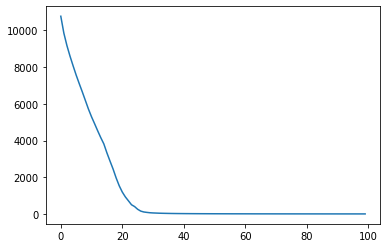

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
# テストデータの母数計算
test_num = len(test)
# 正解の件数
a = 0
# 勾配自動計算OFF
with torch.no_grad():
    for title, category in zip(test["title"], test["category"]):
        # テストデータの予測
        inputs = sentence2index(title)
        out = model(inputs)

        # outの一番大きい要素を予測結果をする
        _, predict = torch.max(out, 1)

        answer = category2tensor(category)
        if predict == answer:
            a += 1
print("predict : ", a / test_num)
# predict :  0.6118391323994578

['ドコモ', '搭載', 'インチスマホ', 'を', '発表', 'や', '防水', 'ワンセグ', 'に', '対応']
['値段', 'を', '気', 'に', 'せ', 'ず', 'ガンガン', '飲める', 'オリジナルホエイプロテイン', '発売']
['あなた', 'は', 'いくつ', 'まで', '恋', 'が', 'できる', 'と', '思い', 'ます', 'か']
['あなた', 'の', 'は', '大丈夫', '楽天', 'ポイント', 'の', '不正', '利用', '問題', '被害', '規模', 'は', '拡大', 'か', 'ニュース']
['電力', '使用', '状況', 'グラフ', 'に', 'ダマ', 'さ', 'れる', 'な', 'デジ', '通']
['新', '境地', '開拓', 'か', '奇行', 'か', '鬼束', 'ちひろ', '″', '暴走', '″', 'の', '行く末']
['ドコモ', 'の', '通話', '中', 'に', 'まれ', 'に', '相手', 'の', '声', 'が', '聞こえ', 'ない', '不具合', 'など', 'で', 'ソフトウェア', '更新', 'を', '提供', '開始']
['が', '伝授', 'ワン', 'ランク', '上', 'を', '行く', 'スーツ', 'の', '着こなし', '方', '新', '生活', '特集']
['次世代', 'ジェットコースターショッカーミステリー', 'スクリーム', 'が', 'ブルー', 'レイ', 'に', 'なっ', 'て', '登場']
['ディズニー', 'の', '夢', 'を', '叶え', 'た', '巨編', 'ジョン', 'カーター', '迫り', '来る', '異形', 'の', '怪物', 'たち']
['本当に', '中身', 'は', 'らくらく', 'な', 'の', 'か', 'シニア', '向け', 'ドコモスマホ', 'らくらく', 'スマート', 'フォン', 'の', 'ソフトウェア', 'を', 'チェック', 'レビュー']
['週末', '映画', 'まとめ', '読み', '海外', '賞', 'レース', 'の', '行方', 'は',

In [ ]:
traindata_num = len(train)
a = 0
with torch.no_grad():
    for title, category in zip(train["title"], train["category"]):
        inputs = sentence2index(title)
        out = model(inputs)
        _, predict = torch.max(out, 1)
        answer = category2tensor(category)
        if predict == answer:
            a += 1
print("predict : ", a / traindata_num)
# predict :  0.9984505132674801

ストリーミング出力は最後の 5000 行に切り捨てられました。
['企業', 'の', '業績', 'と', '戦略', 'を', 'で', 'チェック', '資料', '会社', '資料', 'ダウンロード', 'サービス', 'デジ', '通']
['重量', 'を', '当て', 'て', 'を', 'ゲット', 'の', '重', 'さ', '当て', 'クイズ', 'デジ', '通']
['ドコモ', 'ユーザー', '大丈夫', 'あなた', 'の', 'ケータイ', 'が', '今週', 'いっぱい', 'で', '使え', 'なく', 'なる', 'かも', 'ニュース']
['肉食', '女子', 'は', '要', 'チェック', '最強', 'の', '安心', '安全', 'ロハス', 'な', 'ビーフ']
['韓国', '企業', 'と', 'の', '提携', 'を', '発表', 'し', 'た', '亀田製菓', 'の', 'ブログ', 'が', '炎上']
['高田', '監督', '辞任', 'は', '少年', 'ファン', 'の', '暴言', 'が', '決め手', 'に']
['ザッケローニ', '新', '監督', 'イタリア', '記者', 'の', '評価', 'は']
['時間', 'つぶし', 'に', '有効', 'ゲーセン', 'に', '設置', 'さ', 'れ', 'て', 'いる', '一', '人', '用', 'カラオケボックス', '話題']
['もちろん', '見', 'て', 'き', 'まし', 'た', 'デル', 'が', 'はなつ', 'の', '本命', '写真', 'で', '見', 'て', 'も', 'カッコイイ']
['ジュエル', 'クリップ', 'で', 'オフィス', 'でも', '簡単', '愛さ', 'れ', 'に']
['ページ', 'を', '丸ごと', '取り込む', 'ワザ', '知っ', 'て', 'いる', 'と', 'お', '得', 'な', 'パソコン', '快適', '術', '知っ', '得', '虎の巻']
['頭', 'おかしい', '被災', '地', 'アイドル', 'デビュー', 'に', '疑問', 'の', '声']
['落合'

## 過学習しているね！！！

In [ ]:
import collections
index2category = {}
for cat, idx in category2index.items():
    index2category[idx] = cat

In [ ]:
predict_df = pd.DataFrame(columns=["answer", "predict", "exact"])

In [ ]:
with torch.no_grad():
    for title, category in zip(test["title"], test["category"]):
        out = model(sentence2index(title))
        _, predict = torch.max(out, 1)
        answer = category2tensor(category)
        exact = "O" if predict.item() == answer.item() else "X"
        s = pd.Series([answer.item(), predict.item(), exact], index=predict_df.columns)
        predict_df = predict_df.append(s, ignore_index=True)

['ドコモ', '搭載', 'インチスマホ', 'を', '発表', 'や', '防水', 'ワンセグ', 'に', '対応']
['値段', 'を', '気', 'に', 'せ', 'ず', 'ガンガン', '飲める', 'オリジナルホエイプロテイン', '発売']
['あなた', 'は', 'いくつ', 'まで', '恋', 'が', 'できる', 'と', '思い', 'ます', 'か']
['あなた', 'の', 'は', '大丈夫', '楽天', 'ポイント', 'の', '不正', '利用', '問題', '被害', '規模', 'は', '拡大', 'か', 'ニュース']
['電力', '使用', '状況', 'グラフ', 'に', 'ダマ', 'さ', 'れる', 'な', 'デジ', '通']
['新', '境地', '開拓', 'か', '奇行', 'か', '鬼束', 'ちひろ', '″', '暴走', '″', 'の', '行く末']
['ドコモ', 'の', '通話', '中', 'に', 'まれ', 'に', '相手', 'の', '声', 'が', '聞こえ', 'ない', '不具合', 'など', 'で', 'ソフトウェア', '更新', 'を', '提供', '開始']
['が', '伝授', 'ワン', 'ランク', '上', 'を', '行く', 'スーツ', 'の', '着こなし', '方', '新', '生活', '特集']
['次世代', 'ジェットコースターショッカーミステリー', 'スクリーム', 'が', 'ブルー', 'レイ', 'に', 'なっ', 'て', '登場']
['ディズニー', 'の', '夢', 'を', '叶え', 'た', '巨編', 'ジョン', 'カーター', '迫り', '来る', '異形', 'の', '怪物', 'たち']
['本当に', '中身', 'は', 'らくらく', 'な', 'の', 'か', 'シニア', '向け', 'ドコモスマホ', 'らくらく', 'スマート', 'フォン', 'の', 'ソフトウェア', 'を', 'チェック', 'レビュー']
['週末', '映画', 'まとめ', '読み', '海外', '賞', 'レース', 'の', '行方', 'は',

In [ ]:
fscore_df = pd.DataFrame(columns=["category", "all","precison", "recall", "fscore"])

In [ ]:
prediction_count = collections.Counter(predict_df["predict"])
answer_count = collections.Counter(predict_df["answer"])

In [ ]:
for i in range(9):
    all_count = answer_count[i]
    precision = len(predict_df.query('predict == ' + str(i) + ' and exact == "O"')) / prediction_count[i]
    recall = len(predict_df.query('answer == ' + str(i) + ' and exact == "O"')) / all_count
    fscore = 2*precision*recall / (precision + recall)
    s = pd.Series([index2category[i], all_count, round(precision, 2), round(recall, 2), round(fscore, 2)], index=fscore_df.columns)
    fscore_df = fscore_df.append(s, ignore_index=True)
print(fscore_df)

         category  all  precison  recall  fscore
0  dokujo-tsushin  259      0.63    0.64    0.64
1     movie-enter  288      0.53    0.49    0.51
2          peachy  244      0.46    0.42    0.44
3            smax  256      0.87    0.86    0.86
4  livedoor-homme  186      0.60    0.55    0.57
5    sports-watch  231      0.45    0.50    0.47
6   kaden-channel  264      0.81    0.77    0.79
7      topic-news  238      0.51    0.53    0.52
8    it-life-hack  253      0.59    0.67    0.63
